# Let's Build More Complicated Application, Using CNN Architecture

# Importing libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Importing data

In [2]:
df = pd.read_csv('train.csv')
df.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# Feature Engineering And splitting data

In [3]:
# drop the Lable column from the training dataset
x = df.drop('label', axis=1).values
# reshape to (num_samples, 28, 28, 1)
x = x.reshape(-1, 28, 28, 1)  
# normalize pixal values
x = x / 255.0
# save labels into the testing dataset
y = df['label']
# split datasets
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size = 0.8, random_state = 42)

# Check shapes
print(f"x_train shape: {x_train.shape}, y_train shape: {y_train.shape}")
print(f"x_test shape: {x_test.shape}, y_test shape: {y_test.shape}")

x_train shape: (33600, 28, 28, 1), y_train shape: (33600,)
x_test shape: (8400, 28, 28, 1), y_test shape: (8400,)


# Callback Function for Keras to stop Training when it seems done...

In [4]:
class MyCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if (logs.get('accuracy') > 0.99):
            print(f"\nReached 99% accuracy - end of training!")
            self.model.stop_training = True

# CNN Model Building

In [5]:
model = tf.keras.models.Sequential([
		tf.keras.layers.Input(shape=(28,28,1)),
        tf.keras.layers.Conv2D(64, (3,3), activation = "relu"),
        tf.keras.layers.MaxPooling2D(2,2),
        tf.keras.layers.Conv2D(64, (3,3), activation = "relu"),
        tf.keras.layers.MaxPooling2D(2,2),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(128, activation='relu'),
        tf.keras.layers.Dense(10, activation='softmax')
])

In [6]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [7]:
model.fit(x_train, y_train, epochs=100, callbacks = [MyCallback()])

Epoch 1/100
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.8820 - loss: 0.3748
Epoch 2/100
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.9838 - loss: 0.0521
Epoch 3/100
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.9885 - loss: 0.0357
Epoch 4/100
1043/1050 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9909 - loss: 0.0267
Reached 99% accuracy - end of training!
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.9909 - loss: 0.0267


# Model Testing

In [8]:
y_hat = model.predict(x_test)
y_hat = np.argmax(y_hat, axis = 1)

263/263 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step 


In [9]:
accuracy_score(y_hat, y_test)
print(y_hat)

[8 1 9 ... 3 0 9]


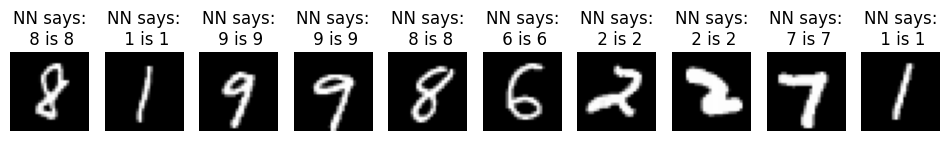

In [10]:
n_images = 10
plt.figure(figsize= (12,6))

for i in range(n_images):
  image = x_test[i].reshape(28,28)
  label = y_test.iloc[i]
  #model_prediction = model.predict(x_test[i].reshape(1,784)).argmax()

  plt.subplot(1, n_images, i+1)
  plt.imshow(x_test[i].reshape(28,28), cmap='gray')
  plt.axis('off')
  plt.title(f"NN says:\n {label} is {y_hat[i]}")

plt.show()